This notebook is my first exploration of the Goyal 2018 data.

Specifically, I need to figure out which of the duplicate samples I want to use (some samples were run twice, presumably because they "failed" sequencing).

Let's keep track of my conclusions up here:
- patient 007
    - FMT.01.007.P has fewer than 1000 reads
    - FMT.01.007.PX has 6700 reads (keep this one)
    
Samples to remove (the first one for samples with repeat sequencing):

'FMT.01.007.P', 'FMT.01.029.D1', 'FMT.01.022.W', 'FMT.01.005.6M', 'FMT.01.010.PA', 'FMT.01.024.P1', 'FMT.01.024.D1', 'FMT.01.024.6M'

Rationale: since the duplicate samples have about the same number of reads (differing by ~1000 reads at most, except for patient 007), I am going to keep the second sample in each pair (or at least try to guess which is the second sample...)

In [1]:
import pandas as pd
import numpy as np
#import skbio.diversity.alpha as alph
#from skbio.diversity import beta_diversity 
#from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('white')

In [2]:
fotu = '../../data/qiime-proc/goyal2018/exported_data/goyal2018.feature-table.txt'
fmeta = '../../data/clean/goyal2018.metadata.txt'

In [3]:
df = pd.read_csv(fotu, sep='\t', skiprows=1, index_col=0).T
df.head()

#OTU ID,90139774f761b15ef73f969b9efd29c7,c3cd39227e9ebd70fee95899f7485e4e,72d0d5bc25a3359c411b0a4b216768d4,2d6840c65916b78bbda71c55c9c47fc2,c87777a2c6afaae4dc36cabf7f0bc928,496f6cd25dd7be563d18574aac235747,86c77007b9d3b2ad0176eb6b6d7b4594,3987e6de21f9d89024d3e329d6fbf443,477dde4c60eb536f9151703d1d7201b0,18cb0bd15c1ac60b2fa0cd93734ef1b3,...,f26848993dc29809d5491c04fd4c5c4a,741af91fc9f1e35745693488fd58cc32,147892512ccaa885b2baf1b6567b54a9,d25888246ccabe0d048877709eabd69e,15fbd641d7b8793b605b376efc349547,3d36879c896515993d72bc9b32e2ec57,e8fe766ab8fa4e367d854c66ef3ce1d8,434105c7b871137b1bdfeb9881fdd358,0dc6392e5cfa24100e54254bdf66bbfe,30f579537c1b617e35e752f02633a9c2
FMT.03.042.W,2194.0,1734.0,1597.0,1457.0,1445.0,1284.0,1281.0,1274.0,1059.0,926.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FMT.01.022.W,78.0,152.0,0.0,119.0,0.0,2.0,32.0,0.0,0.0,753.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FMT.01.022.6M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FMT.03.032.M,2414.0,2039.0,73.0,45.0,33.0,77.0,24.0,28.0,153.0,1116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FMT.01.007.D,15.0,12.0,50.0,37.0,7.0,62.0,22.0,0.0,309.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
meta = pd.read_csv(fmeta, sep='\t')
meta.head()

,study_accession,secondary_study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,submission_accession,tax_id,scientific_name,instrument_platform,...,sequencing_run,patient_id,sample_type,time_point,Patient # dds 1/26/15,Screen,Week 1,Month 1,Month 6,Notes
0,PRJNA380944,SRP102742,SAMN06652281,SRS2088440,SRX2691263,SRR5396454,SRA550516,408170,human gut metagenome,ILLUMINA,...,3,42,W,1_week,042 JJC,10.0,0.0,0.0,NaN,NaN
1,PRJNA380944,SRP102742,SAMN06652280,SRS2088438,SRX2691264,SRR5396455,SRA550516,408170,human gut metagenome,ILLUMINA,...,3,42,P,pre_fmt,042 JJC,10.0,0.0,0.0,NaN,NaN
2,PRJNA380944,SRP102742,SAMN06652279,SRS2088439,SRX2691265,SRR5396456,SRA550516,408170,human gut metagenome,ILLUMINA,...,3,42,D,donor,042 JJC,10.0,0.0,0.0,NaN,NaN
3,PRJNA380944,SRP102742,SAMN06652278,SRS2088441,SRX2691266,SRR5396457,SRA550516,408170,human gut metagenome,ILLUMINA,...,3,40,M,1_month,040 RJ,27.5,10.0,10.0,0,NaN
4,PRJNA380944,SRP102742,SAMN06652277,SRS2088442,SRX2691267,SRR5396458,SRA550516,408170,human gut metagenome,ILLUMINA,...,3,40,W,1_week,040 RJ,27.5,10.0,10.0,0,NaN


In [6]:
print([i for i in meta['sample_alias'].tolist() if i not in df.index])
print([i for i in df.index if i not in meta['sample_alias'].tolist() ])

[]
[]


# OTU table checks

- How many reads per sample?
- How many OTUs per sample? Per person?
- How many OTUs are unique to each sample? Person? (x-axis = N people, y-axis=N OTUs)

### Reads per sample

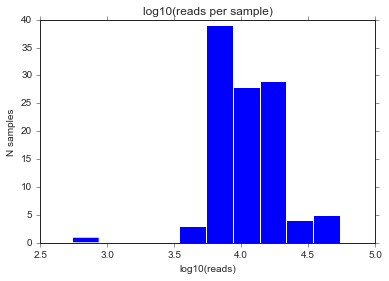

In [7]:
df.sum(axis=1).apply(np.log10).plot(kind='hist')
plt.title('log10(reads per sample)')
plt.xlabel('log10(reads)')
plt.ylabel('N samples')

Which samples have fewer than 1000 reads?

In [9]:
df[df.sum(axis=1) < 1000]

#OTU ID,90139774f761b15ef73f969b9efd29c7,c3cd39227e9ebd70fee95899f7485e4e,72d0d5bc25a3359c411b0a4b216768d4,2d6840c65916b78bbda71c55c9c47fc2,c87777a2c6afaae4dc36cabf7f0bc928,496f6cd25dd7be563d18574aac235747,86c77007b9d3b2ad0176eb6b6d7b4594,3987e6de21f9d89024d3e329d6fbf443,477dde4c60eb536f9151703d1d7201b0,18cb0bd15c1ac60b2fa0cd93734ef1b3,...,f26848993dc29809d5491c04fd4c5c4a,741af91fc9f1e35745693488fd58cc32,147892512ccaa885b2baf1b6567b54a9,d25888246ccabe0d048877709eabd69e,15fbd641d7b8793b605b376efc349547,3d36879c896515993d72bc9b32e2ec57,e8fe766ab8fa4e367d854c66ef3ce1d8,434105c7b871137b1bdfeb9881fdd358,0dc6392e5cfa24100e54254bdf66bbfe,30f579537c1b617e35e752f02633a9c2
FMT.01.007.P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Does this patient have another sample?

In [11]:
meta.query('patient_id == "007"')['sample_type']

80    PX
81    6M
82     M
83     W
84     P
85     D
Name: sample_type, dtype: object

Yes, this patient has P and PX. Let's see how many reads the PX sample has:

In [15]:
s = meta.query('patient_id == "007"').query('sample_type == "PX"')['sample_alias'].values
df.loc[s].sum(axis=1)

FMT.01.007.PX    6722.0
dtype: float64

Okay, the resequenced sample has 6000 reads. That should be fine.

### OTUs per sample


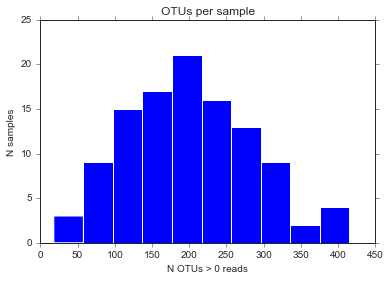

In [16]:
(df > 0).sum(axis=1).plot(kind='hist')
plt.title('OTUs per sample')
plt.xlabel('N OTUs > 0 reads')
plt.ylabel('N samples')

Looks reasonable.

### OTUs per patient

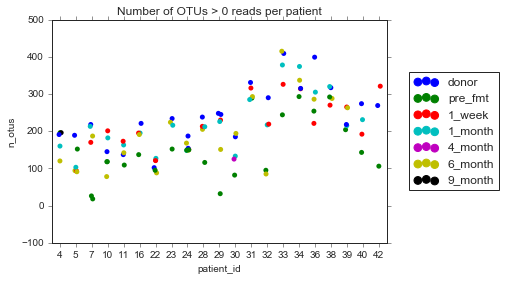

In [20]:
time_order = ['donor', 'pre_fmt', '1_week', '1_month', '4_month', '6_month', '9_month']

sns.stripplot(
    data=((df > 0)
        .sum(axis=1)
        .reset_index(name='n_otus')
        .rename(columns={'index': 'sample_alias'})
        .merge(meta, left_on='sample_alias', right_on='sample_alias')
     ),
    x='patient_id',
    y='n_otus',
    hue='time_point',
    hue_order=time_order
)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title('Number of OTUs > 0 reads per patient')


Yep, this also looks good - the donor tends to have the most OTUs, and the pre-FMT sample has the fewest.

### Re-sequenced samples

Hm, so which other samples were sequenced multiple times? Andrew said it's because they must have failed sequencing, but their data is here...

In [25]:
(meta
    .groupby(['patient_id', 'time_point'])
    .size()
    .reset_index(name='n_samples')
    .sort_values(by='n_samples', ascending=False)
    .head(10)
)

,patient_id,time_point,n_samples
14,7,pre_fmt,2
52,29,donor,2
31,22,1_week,2
7,5,6_month,2
19,10,pre_fmt,2
43,24,pre_fmt,2
42,24,donor,2
41,24,6_month,2
66,32,6_month,1
73,33,pre_fmt,1


We already figured out patient 007. Let's check the others.

In [38]:
dup_df = (meta
    .groupby(['patient_id', 'time_point'])
    .size()
    .reset_index(name='n_samples')
    .sort_values(by='n_samples', ascending=False)
)
dup_df = dup_df[dup_df['n_samples'] > 1]

In [41]:
dup_samples = []
for idx, row in dup_df.iterrows():
    p = row['patient_id']
    t = row['time_point']
    s = meta.query('patient_id == @p').query('time_point == @t')['sample_alias'].values.tolist()
    print(s)
    dup_samples += s

['FMT.01.007.PX', 'FMT.01.007.P']
['FMT.01.029.D2', 'FMT.01.029.D1']
['FMT.01.022.WX', 'FMT.01.022.W']
['FMT.01.005.6MX', 'FMT.01.005.6M']
['FMT.01.010.PB', 'FMT.01.010.PA']
['FMT.01.024.P1', 'FMT.01.024.P2']
['FMT.01.024.D2', 'FMT.01.024.D1']
['FMT.01.024.6MX', 'FMT.01.024.6M']


In [45]:
df.loc[dup_samples].sum(axis=1)

FMT.01.007.PX     6722.0
FMT.01.007.P       548.0
FMT.01.029.D2     7846.0
FMT.01.029.D1     7411.0
FMT.01.022.WX     8455.0
FMT.01.022.W      6342.0
FMT.01.005.6MX    8601.0
FMT.01.005.6M     6523.0
FMT.01.010.PB     8234.0
FMT.01.010.PA     9837.0
FMT.01.024.P1     7530.0
FMT.01.024.P2     6710.0
FMT.01.024.D2     8422.0
FMT.01.024.D1     7029.0
FMT.01.024.6MX    7368.0
FMT.01.024.6M     7548.0
dtype: float64

In [46]:
10**3.5

3162.2776601683795

Hm, this is weird - really can't tell why some of these samples underwent repeat sequencing.

Let's be safe rather than sorry and just take the "second" sample for each of these.

Meh, let's only do that if we end up doing stats on this. For now, let's just lump them all together! #lazy